# NLP Part 2- Word Embedding - Imdb Reviews Dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Import Data

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [5]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Tokenize

In [6]:
# Define params
vocab_size = 10000
embedding_dim =16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

## Create NN Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
  # tf.keras.layers.GlobalAveragePooling1D(),       # Second option instead of using flatten layer
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_hist = model.fit(padded, training_labels_final ,epochs=10, validation_data=(testing_padded, testing_labels_final) ,verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9985 - loss: 0.0102 - val_accuracy: 0.8061 - val_loss: 0.7622
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.8134 - val_loss: 0.7704
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9999 - loss: 6.1085e-04 - val_accuracy: 0.8172 - val_loss: 0.7975
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 1.4748e-04 - val_accuracy: 0.8183 - val_loss: 0.8240
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 8.4183e-05 - val_accuracy: 0.8181 - val_loss: 0.8486
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 5.1039e-05 - val_accuracy: 0.8191 - val_loss: 0.8777
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 3.3815e-05 - val_accuracy: 0.8194 - val_loss: 0.9034
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 2.093

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 120, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │        11,526 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,601 (1.96 MB)

 Trainable params: 171,533 (670.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 343,068 (1.31 MB)

In [ ]:
# Embedding details
e = model.layers[0]       # layer 0 is Embedding layers in the defined model
weights = e.get_weights()[0]
print(weights.shape)    # shape is (vocab size, embedding_dim)

In [11]:
# For visualize first is needed to reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [12]:
import io

In [13]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

## Create LSTM Model

In [11]:
ls_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2 layer LSTM
ls2_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
ls_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ls2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
ls_history = ls_model.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.6824 - loss: 0.5760 - val_accuracy: 0.8326 - val_loss: 0.3747
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.8840 - loss: 0.2961 - val_accuracy: 0.8405 - val_loss: 0.3670
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.9136 - loss: 0.2258 - val_accuracy: 0.8353 - val_loss: 0.3770
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9360 - loss: 0.1763 - val_accuracy: 0.8313 - val_loss: 0.4376
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.9541 - loss: 0.1258 - val_accuracy: 0.8152 - val_loss: 0.5229
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.9728 - loss: 0.0793 - val_accuracy: 0.8218 - val_loss: 0.6230
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.9827 - loss: 0.0537 - val_accuracy: 0.8206 - val_loss: 0.7821
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.9821 - loss: 0.0524 - 

In [15]:
ls_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 120, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        41,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629,381 (2.40 MB)

 Trainable params: 209,793 (819.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 419,588 (1.60 MB)

## RNN Model - GRU

In [18]:
gr_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
gr_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
gr_hist = gr_model.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.8872 - loss: 0.2833 - val_accuracy: 0.8142 - val_loss: 0.4027
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.9181 - loss: 0.2203 - val_accuracy: 0.8335 - val_loss: 0.4049
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.9420 - loss: 0.1594 - val_accuracy: 0.8291 - val_loss: 0.4422
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.9619 - loss: 0.1146 - val_accuracy: 0.8043 - val_loss: 0.4992
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.9767 - loss: 0.0761 - val_accuracy: 0.8197 - val_loss: 0.5760
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.8187 - val_loss: 0.6878
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.8174 - val_loss: 0.7019
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.9932 - loss: 0.0239 - 

In [23]:
gr_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 120, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 64)             │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 509,993 (1.95 MB)

 Trainable params: 169,997 (664.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 339,996 (1.30 MB)

## Create CNN

In [24]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
cnn_hist = cnn_model.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6874 - loss: 0.5573 - val_accuracy: 0.8497 - val_loss: 0.3487
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8876 - loss: 0.2815 - val_accuracy: 0.8468 - val_loss: 0.3502
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9159 - loss: 0.2229 - val_accuracy: 0.8410 - val_loss: 0.3735
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9356 - loss: 0.1787 - val_accuracy: 0.8341 - val_loss: 0.4103
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9518 - loss: 0.1475 - val_accuracy: 0.8290 - val_loss: 0.4605
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9636 - loss: 0.1159 - val_accuracy: 0.8206 - val_loss: 0.5029
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9744 - loss: 0.0905 - val_accuracy: 0.8122 - val_loss: 0.6219
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9806 - loss: 0.0688 - 

In [27]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 120, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 116, 128)       │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           774 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513,449 (1.96 MB)

 Trainable params: 171,149 (668.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,300 (1.31 MB)

## Visualize Results

In [32]:
import matplotlib.pyplot as plt

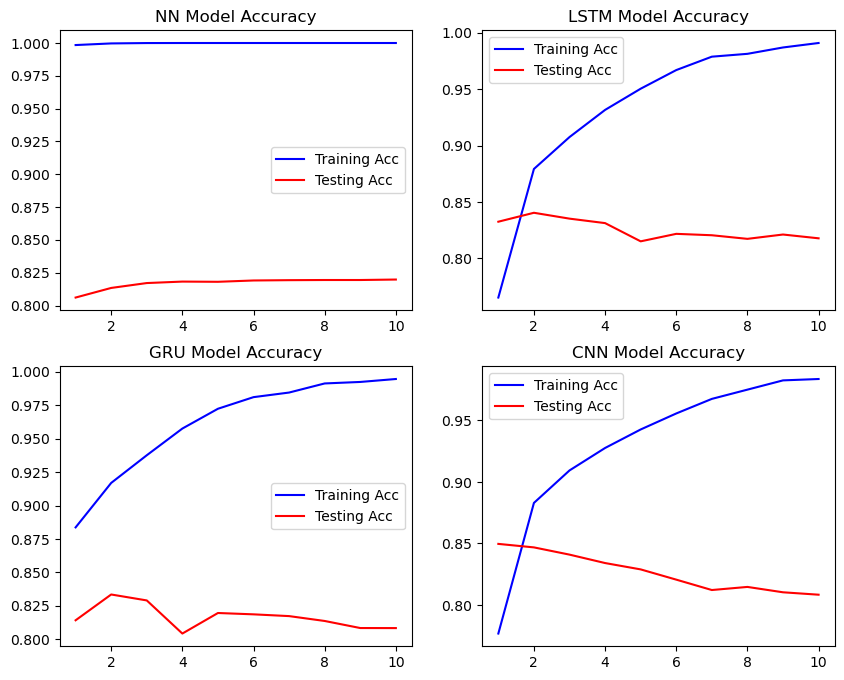

In [48]:
epochs = range(1,11)

fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(epochs, nn_hist.history['accuracy'], 'b', label='Training Acc')
axs[0,0].plot(epochs, nn_hist.history['val_accuracy'], 'r', label='Testing Acc')
axs[0,0].set_title('NN Model Accuracy')
axs[0,0].legend()

axs[0,1].plot(epochs, ls_history.history['accuracy'], 'b', label='Training Acc')
axs[0,1].plot(epochs, ls_history.history['val_accuracy'], 'r', label='Testing Acc')
axs[0,1].set_title('LSTM Model Accuracy')
axs[0,1].legend()

axs[1,0].plot(epochs, gr_hist.history['accuracy'], 'b', label='Training Acc')
axs[1,0].plot(epochs, gr_hist.history['val_accuracy'], 'r', label='Testing Acc')
axs[1,0].set_title('GRU Model Accuracy')
axs[1,0].legend()

axs[1,1].plot(epochs, cnn_hist.history['accuracy'], 'b', label='Training Acc')
axs[1,1].plot(epochs, cnn_hist.history['val_accuracy'], 'r', label='Testing Acc')
axs[1,1].set_title('CNN Model Accuracy')
axs[1,1].legend()

plt.show()

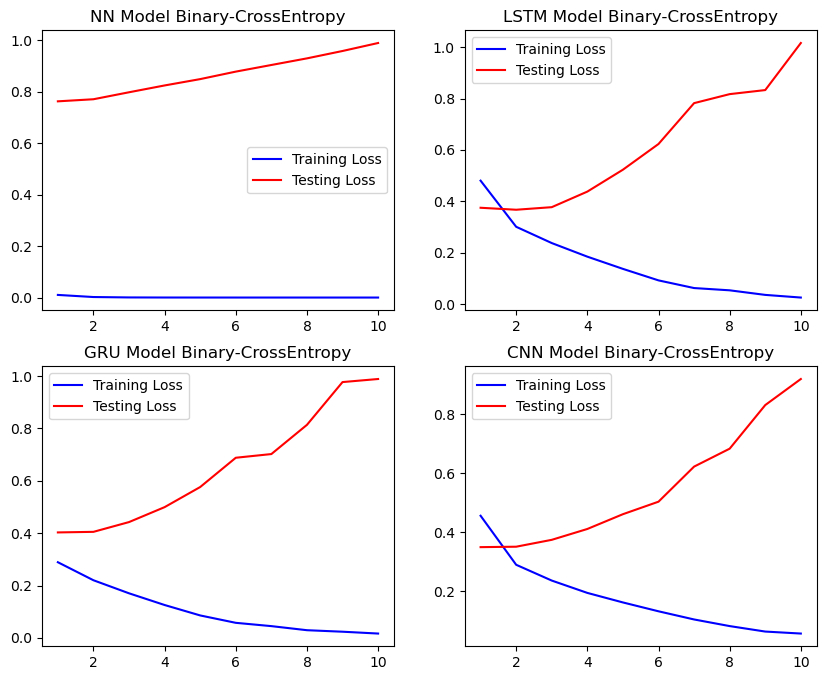

In [49]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0,0].plot(epochs, nn_hist.history['loss'], 'b', label='Training Loss')
axs[0,0].plot(epochs, nn_hist.history['val_loss'], 'r', label='Testing Loss')
axs[0,0].set_title('NN Model Binary-CrossEntropy')
axs[0,0].legend()

axs[0,1].plot(epochs, ls_history.history['loss'], 'b', label='Training Loss')
axs[0,1].plot(epochs, ls_history.history['val_loss'], 'r', label='Testing Loss')
axs[0,1].set_title('LSTM Model Binary-CrossEntropy')
axs[0,1].legend()

axs[1,0].plot(epochs, gr_hist.history['loss'], 'b', label='Training Loss')
axs[1,0].plot(epochs, gr_hist.history['val_loss'], 'r', label='Testing Loss')
axs[1,0].set_title('GRU Model Binary-CrossEntropy')
axs[1,0].legend()

axs[1,1].plot(epochs, cnn_hist.history['loss'], 'b', label='Training Loss')
axs[1,1].plot(epochs, cnn_hist.history['val_loss'], 'r', label='Testing Loss')
axs[1,1].set_title('CNN Model Binary-CrossEntropy')
axs[1,1].legend()

plt.show()